In [1]:
#!pip install --upgrade tensorflow==1.15

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
names = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'Class']

dataset = pd.read_csv('iris.data', names=names)

In [4]:
dataset.head()
dataset

,sepal-length,sepal-width,petal-length,petal-width,Class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [5]:
X = dataset.iloc[:, :-1].values
Y = dataset.iloc[:, 4].values

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size =0.2)

In [7]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [8]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(X_train, Y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

Pada code diatas K-valuenya adalah 5 dimana merupakan akar dari total jumlah N atau jumlah semua data yang ditest yaitu 30 dimana merupakan 0.2 bagian dari total dataset yaitu 150

In [9]:
Y_pred = classifier.predict(X_test)

In [10]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(Y_test, Y_pred))
print(classification_report(Y_test, Y_pred))

[[ 8  0  0]
 [ 0 11  2]
 [ 0  0  9]]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         8
Iris-versicolor       1.00      0.85      0.92        13
 Iris-virginica       0.82      1.00      0.90         9

       accuracy                           0.93        30
      macro avg       0.94      0.95      0.94        30
   weighted avg       0.95      0.93      0.93        30



Dapat dilihat bahwa model mencapai 100% akurasi dengan menggunakan k-value 5

In [11]:
error = []

for i in range(1, 40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, Y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != Y_test))

Text(0, 0.5, 'Mean Error')

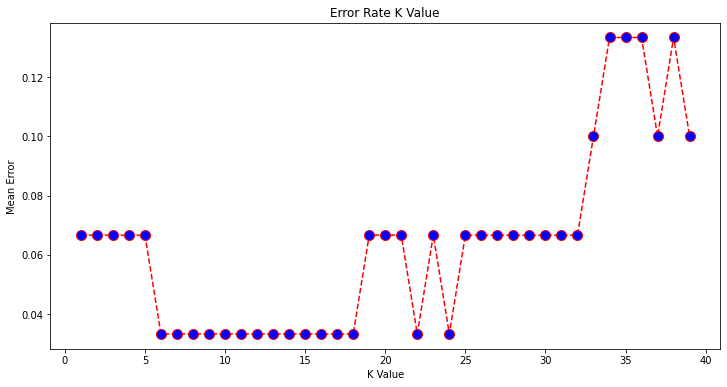

In [12]:
plt.figure(figsize=(12, 6))
plt.plot(range(1, 40), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')

Dapat dilihat pada perbandingan grafik  diatas(membandingkan k-value dengan error rate) dimana dicoba untuk diloop k-value dari terkecil menuju terbesar dan dapat dilihat bahwa pada pada k-value 5 sampai 18 error rate yang didapat adalah kecil atau 0 dan pada k-value 1 sampai 4 didapat error yang cukup besar apa lagi pada k-value diatas 30